In [1]:
#kaggle이나 공공데이터포털 가서 csv 데이터 파일을 받아서 결측치 제거하고 이래저래 처리해서 제출

#인터넷에서 데이터셋 검색해서 분석하는 자료들 참고

In [2]:
# 필요한 라이브러리를 import 합니다

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'


In [3]:
# read_csv() 메소드를 사용해 df 이름의 데이터 프레임으로 저장합니다.
# index_col 옵션을 사용하면 인덱스에도 열 이름을 붙일 수 있습니다.

df = pd.read_csv('mosquito.csv', encoding='cp949')
df

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2022-08-31,100.0,38.6,44.4
1,2022-08-30,100.0,42.0,49.4
2,2022-08-29,0.0,0.0,0.0
3,2022-08-28,100.0,44.5,53.1
4,2022-08-27,100.0,41.1,48.1
...,...,...,...,...
5264,1970-01-01,0.0,0.0,0.0
5265,1970-01-01,0.0,0.0,0.0
5266,1970-01-01,0.0,0.0,0.0
5267,1970-01-01,0.0,0.0,0.0


In [4]:
# 데이터프레임의 shape를 확인합니다.
df.shape

(5269, 4)

In [5]:
# 데이터프레임의 데이터 상위 5개를 확인합니다.
df.head(5)

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2022-08-31,100.0,38.6,44.4
1,2022-08-30,100.0,42.0,49.4
2,2022-08-29,0.0,0.0,0.0
3,2022-08-28,100.0,44.5,53.1
4,2022-08-27,100.0,41.1,48.1


In [6]:
# 데이터프레임의 데이터 하위 5개를 확인합니다.
df.tail(5)

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
5264,1970-01-01,0.0,0.0,0.0
5265,1970-01-01,0.0,0.0,0.0
5266,1970-01-01,0.0,0.0,0.0
5267,1970-01-01,0.0,0.0,0.0
5268,1970-01-01,0.0,0.0,0.0


In [7]:
# info() 메소드로 각열의 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   모기지수 발생일   5269 non-null   object 
 1   모기지수(수변부)  5257 non-null   float64
 2   모기지수(주거지)  5257 non-null   float64
 3   모기지수(공원)   5257 non-null   float64
dtypes: float64(3), object(1)
memory usage: 164.8+ KB


In [8]:
# 각 열의 결측치의 갯수를 확인합니다.
df.isnull().sum()

모기지수 발생일      0
모기지수(수변부)    12
모기지수(주거지)    12
모기지수(공원)     12
dtype: int64

In [9]:
# NaN(결측치)를 확인합니다.
df[df['모기지수(수변부)'].isnull() == True]

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
1036,2020-02-17,NaN,NaN,NaN
1605,2018-06-22,NaN,NaN,NaN
1606,2018-06-21,NaN,NaN,NaN
1609,2018-06-20,NaN,NaN,NaN
1610,2018-06-19,NaN,NaN,NaN
1612,2018-06-18,NaN,NaN,NaN
1614,2018-06-17,NaN,NaN,NaN
1616,2018-06-16,NaN,NaN,NaN
1618,2018-06-15,NaN,NaN,NaN
1620,2018-06-14,NaN,NaN,NaN


In [10]:
# 결측치가 존재하는 행을 모두 제거하고 df에 재저장합니다.
df = df[df['모기지수(수변부)'].notnull()]
df

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2022-08-31,100.0,38.6,44.4
1,2022-08-30,100.0,42.0,49.4
2,2022-08-29,0.0,0.0,0.0
3,2022-08-28,100.0,44.5,53.1
4,2022-08-27,100.0,41.1,48.1
...,...,...,...,...
5264,1970-01-01,0.0,0.0,0.0
5265,1970-01-01,0.0,0.0,0.0
5266,1970-01-01,0.0,0.0,0.0
5267,1970-01-01,0.0,0.0,0.0


In [11]:
# 데이터프레임의 shape를 확인하여 정보가 변경됨을 확인합니다.
df.shape

(5257, 4)

In [12]:
df[df['모기지수(수변부)'].isnull() == True]

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)


In [13]:
# 모기지수 발생일 열을 이용해서 '연', '월', '연월', '시', '분', '요일' 파생 변수를 만든다.

df['모기지수 발생일'] = df['모기지수 발생일'].astype('datetime64')
df['연'], df['월'], df['연월'], df['시'], df['분'], df['요일'] = df['모기지수 발생일'].dt.year, df['모기지수 발생일'].dt.month, df['모기지수 발생일'].dt.to_period(freq = 'M'), df['모기지수 발생일'].dt.hour, df['모기지수 발생일'].dt.minute, df['모기지수 발생일'].dt.dayofweek

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
df

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원),연,월,연월,시,분,요일
0,2022-08-31,100.0,38.6,44.4,2022,8,2022-08,0,0,2
1,2022-08-30,100.0,42.0,49.4,2022,8,2022-08,0,0,1
2,2022-08-29,0.0,0.0,0.0,2022,8,2022-08,0,0,0
3,2022-08-28,100.0,44.5,53.1,2022,8,2022-08,0,0,6
4,2022-08-27,100.0,41.1,48.1,2022,8,2022-08,0,0,5
...,...,...,...,...,...,...,...,...,...,...
5264,1970-01-01,0.0,0.0,0.0,1970,1,1970-01,0,0,3
5265,1970-01-01,0.0,0.0,0.0,1970,1,1970-01,0,0,3
5266,1970-01-01,0.0,0.0,0.0,1970,1,1970-01,0,0,3
5267,1970-01-01,0.0,0.0,0.0,1970,1,1970-01,0,0,3


In [15]:
# 1970년 01월 01일 데이터를 제거한 데이터프레임을 만듭니다.
new_df = df[df['모기지수 발생일'] != '1970-01-01']
new_df

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원),연,월,연월,시,분,요일
0,2022-08-31,100.0,38.6,44.4,2022,8,2022-08,0,0,2
1,2022-08-30,100.0,42.0,49.4,2022,8,2022-08,0,0,1
2,2022-08-29,0.0,0.0,0.0,2022,8,2022-08,0,0,0
3,2022-08-28,100.0,44.5,53.1,2022,8,2022-08,0,0,6
4,2022-08-27,100.0,41.1,48.1,2022,8,2022-08,0,0,5
...,...,...,...,...,...,...,...,...,...,...
2406,2016-05-05,243.8,243.8,243.8,2016,5,2016-05,0,0,3
2407,2016-05-04,256.2,256.2,256.2,2016,5,2016-05,0,0,2
2408,2016-05-03,304.0,304.0,304.0,2016,5,2016-05,0,0,1
2409,2016-05-02,273.5,273.5,273.5,2016,5,2016-05,0,0,0


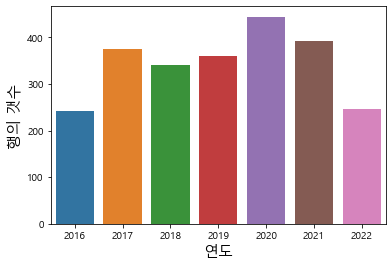

In [16]:
# seaborn을 활용하여 x축에 '연'을 넣고 막대그래프로 시각화합니다. 

x = new_df.groupby('연').count().index
y = new_df.groupby('연')['연'].count()
y
sns.barplot(data=new_df, x= x, y=y)
plt.xlabel('연도', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()


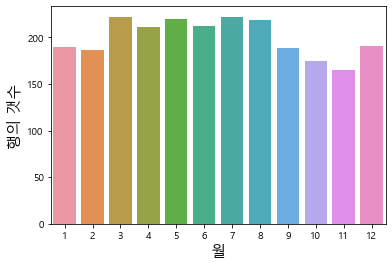

In [17]:
# seaborn을 활용하여 x축에 '월'을 넣고 막대그래프로 시각화합니다. 

x = new_df.groupby('월').count().index
y = new_df.groupby('월')['월'].count()
y
sns.barplot(data=new_df, x= x, y=y)
plt.xlabel('월', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()


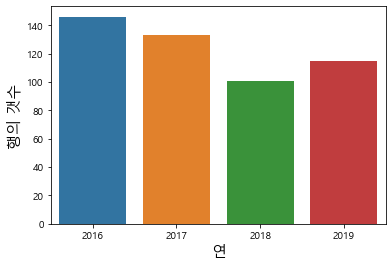

In [18]:
# seaborn을 활용하여 x축에 '연'을 넣고 모기지수(수변부), 모기지수(주거지), 모기지수(공원)이 모두 300.0 이상인 데이터의 통계를 막대그래프로 시각화합니다. 

condy = new_df[(new_df['모기지수(수변부)'] >= 300.0) & (new_df['모기지수(주거지)'] >= 300.0) & (new_df['모기지수(공원)'] >= 300.0)].groupby('연')
x = condy.count().index
y = condy['연'].count()
y
sns.barplot(data=new_df, x= x, y=y)
plt.xlabel('연', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()

월
5      38
6     119
7     125
8      70
9     123
10     20
Name: 월, dtype: int64


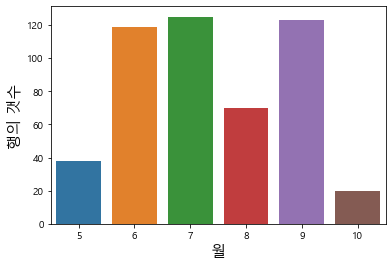

In [19]:
# seaborn을 활용하여 x축에 '월'을 넣고 모기지수(수변부), 모기지수(주거지), 모기지수(공원)이 모두 300.0 이상인 데이터의 통계를 막대그래프로 시각화합니다. 

condm = new_df[(new_df['모기지수(수변부)'] >= 300.0) & (new_df['모기지수(주거지)'] >= 300.0) & (new_df['모기지수(공원)'] >= 300.0)].groupby('월')
x = condm.count().index
y = condm['월'].count()
print(y)
sns.barplot(data=new_df, x= x, y=y)
plt.xlabel('월', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()

In [20]:
# 데이터를 연, 월의 오름차순으로 정렬합니다.

sorted_df = new_df.sort_values(by = ['연', '월'], ascending=[True, True], na_position="first")
sorted_df

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원),연,월,연월,시,분,요일
2380,2016-05-31,427.2,427.2,427.2,2016,5,2016-05,0,0,1
2381,2016-05-30,434.5,434.5,434.5,2016,5,2016-05,0,0,0
2382,2016-05-29,465.9,465.9,465.9,2016,5,2016-05,0,0,6
2383,2016-05-28,487.3,487.3,487.3,2016,5,2016-05,0,0,5
2384,2016-05-27,527.9,527.9,527.9,2016,5,2016-05,0,0,4
...,...,...,...,...,...,...,...,...,...,...
26,2022-08-05,100.0,51.3,63.5,2022,8,2022-08,0,0,4
27,2022-08-04,100.0,50.7,62.5,2022,8,2022-08,0,0,3
28,2022-08-03,100.0,54.5,68.2,2022,8,2022-08,0,0,2
29,2022-08-02,100.0,51.5,63.8,2022,8,2022-08,0,0,1


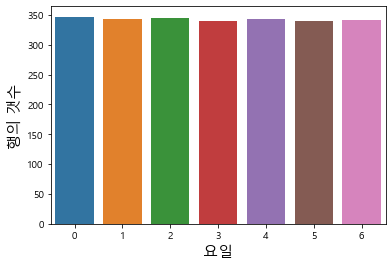

In [21]:
# seaborn을 활용하여 x축에 '요일'을 넣고 막대그래프로 시각화합니다. 
x = new_df.groupby('요일').count().index
y = new_df.groupby('요일')['요일'].count()

sns.barplot(data=new_df, x= x, y=y)
plt.xlabel('요일', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()

In [22]:
# 아래와 같이 요일을 한글로 바꿔 '요일_한글'이라는 파생변수를 만들어 df에 저장합니다.
# 0 => 월, 1 => 화, 2 => 수, 3 => 목, 4 => 금, 5 => 토, 6 => 일
week = { 0: '월', 1: '화', 2: '수', 3:'목', 4:'금', 5:'토', 6:'일'}
new_df['요일_한글'] = new_df['모기지수 발생일'].dt.dayofweek.map(week)

new_df

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원),연,월,연월,시,분,요일,요일_한글
0,2022-08-31,100.0,38.6,44.4,2022,8,2022-08,0,0,2,수
1,2022-08-30,100.0,42.0,49.4,2022,8,2022-08,0,0,1,화
2,2022-08-29,0.0,0.0,0.0,2022,8,2022-08,0,0,0,월
3,2022-08-28,100.0,44.5,53.1,2022,8,2022-08,0,0,6,일
4,2022-08-27,100.0,41.1,48.1,2022,8,2022-08,0,0,5,토
...,...,...,...,...,...,...,...,...,...,...,...
2406,2016-05-05,243.8,243.8,243.8,2016,5,2016-05,0,0,3,목
2407,2016-05-04,256.2,256.2,256.2,2016,5,2016-05,0,0,2,수
2408,2016-05-03,304.0,304.0,304.0,2016,5,2016-05,0,0,1,화
2409,2016-05-02,273.5,273.5,273.5,2016,5,2016-05,0,0,0,월


월
1     189
2     186
3     222
4     205
5      96
6       8
7       2
8      24
9       2
10     81
11    165
12    191
Name: 월, dtype: int64


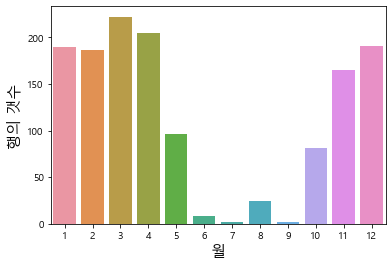

In [23]:
# seaborn을 활용하여 x축에 '월'을 넣고 모기지수(수변부), 모기지수(주거지), 모기지수(공원)이 모두 100.0 미만인 데이터의 통계를 막대그래프로 시각화합니다. 

condm = new_df[(new_df['모기지수(수변부)'] < 100.0) & (new_df['모기지수(주거지)'] < 100.0) & (new_df['모기지수(공원)'] < 100.0)].groupby('월')
x = condm.count().index
y = condm['월'].count()
print(y)
sns.barplot(data=new_df, x= x, y=y)
plt.xlabel('월', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()

In [26]:
#모기지수 평균치 컬럼을 추가합니다.
new_df['모기지수(평균)'] = round((new_df['모기지수(수변부)'] + new_df['모기지수(주거지)'] + new_df['모기지수(공원)'])/3)
new_df


c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원),연,월,연월,시,분,요일,요일_한글,모기지수(평균)
0,2022-08-31,100.0,38.6,44.4,2022,8,2022-08,0,0,2,수,61.0
1,2022-08-30,100.0,42.0,49.4,2022,8,2022-08,0,0,1,화,64.0
2,2022-08-29,0.0,0.0,0.0,2022,8,2022-08,0,0,0,월,0.0
3,2022-08-28,100.0,44.5,53.1,2022,8,2022-08,0,0,6,일,66.0
4,2022-08-27,100.0,41.1,48.1,2022,8,2022-08,0,0,5,토,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2406,2016-05-05,243.8,243.8,243.8,2016,5,2016-05,0,0,3,목,244.0
2407,2016-05-04,256.2,256.2,256.2,2016,5,2016-05,0,0,2,수,256.0
2408,2016-05-03,304.0,304.0,304.0,2016,5,2016-05,0,0,1,화,304.0
2409,2016-05-02,273.5,273.5,273.5,2016,5,2016-05,0,0,0,월,274.0


월
1       7.026455
2       6.930108
3      14.090090
4      28.644550
5     170.209091
6     378.377358
7     456.171171
8     194.890411
9     377.994681
10    150.810345
11     13.527273
12      8.308901
Name: 모기지수(평균), dtype: float64


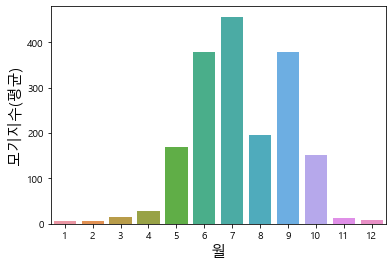

In [27]:
# seaborn을 활용하여 x축에 '월'을 넣고 y축에 모기지수 평균치를 넣어 막대그래프로 시각화합니다. 

x = new_df.groupby('월').count().index
y = new_df.groupby("월")['모기지수(평균)'].mean()
print(y)
sns.barplot(data=new_df, x= x, y=y)
plt.xlabel('월', fontsize=15)
plt.ylabel('모기지수(평균)', fontsize=15)
plt.show()